   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


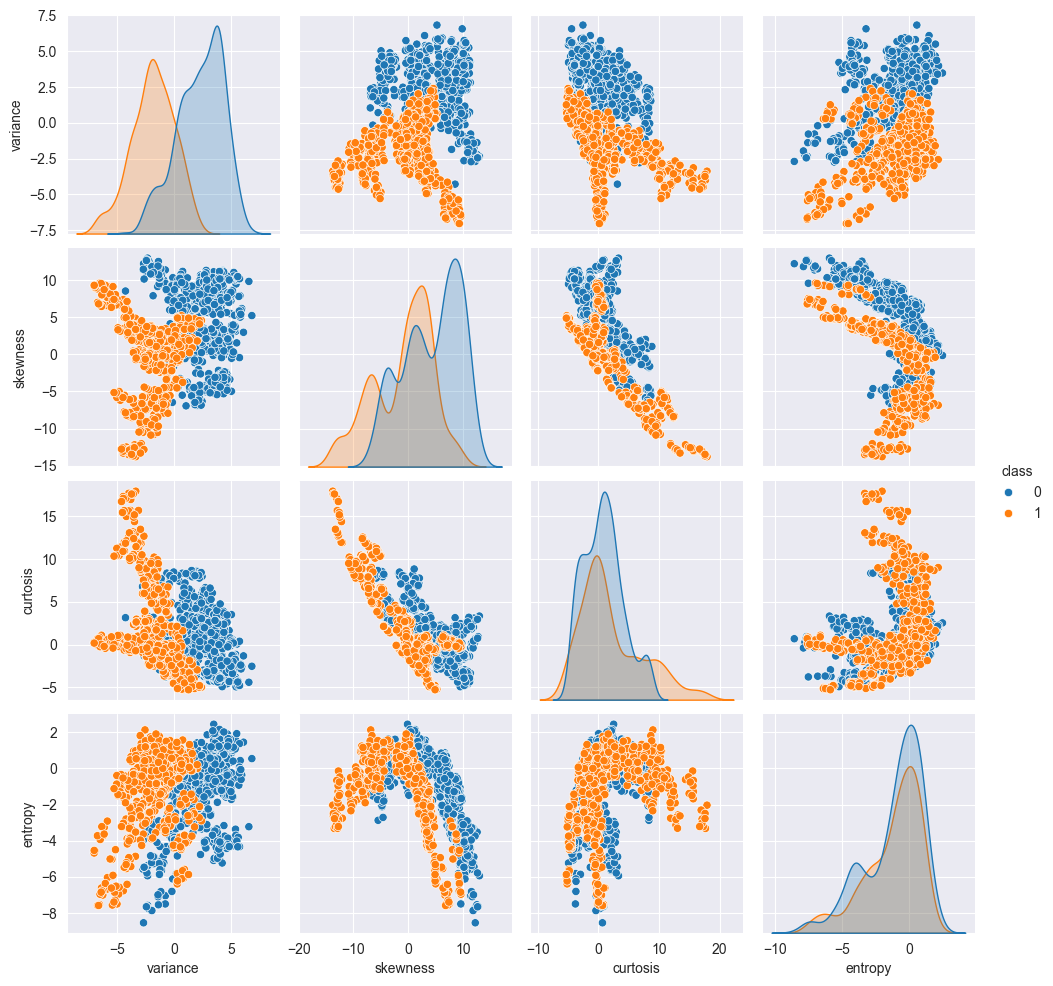

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       148
           1       0.94      0.92      0.93       127

    accuracy                           0.93       275
   macro avg       0.93      0.93      0.93       275
weighted avg       0.93      0.93      0.93       275



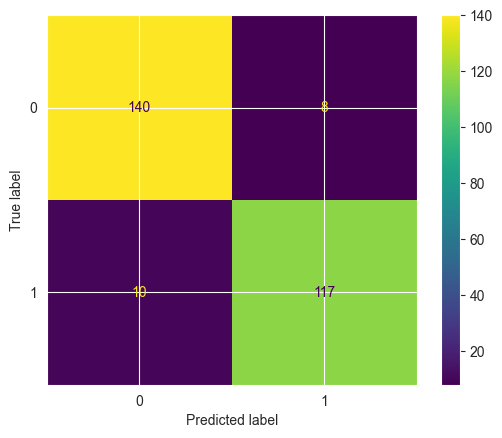

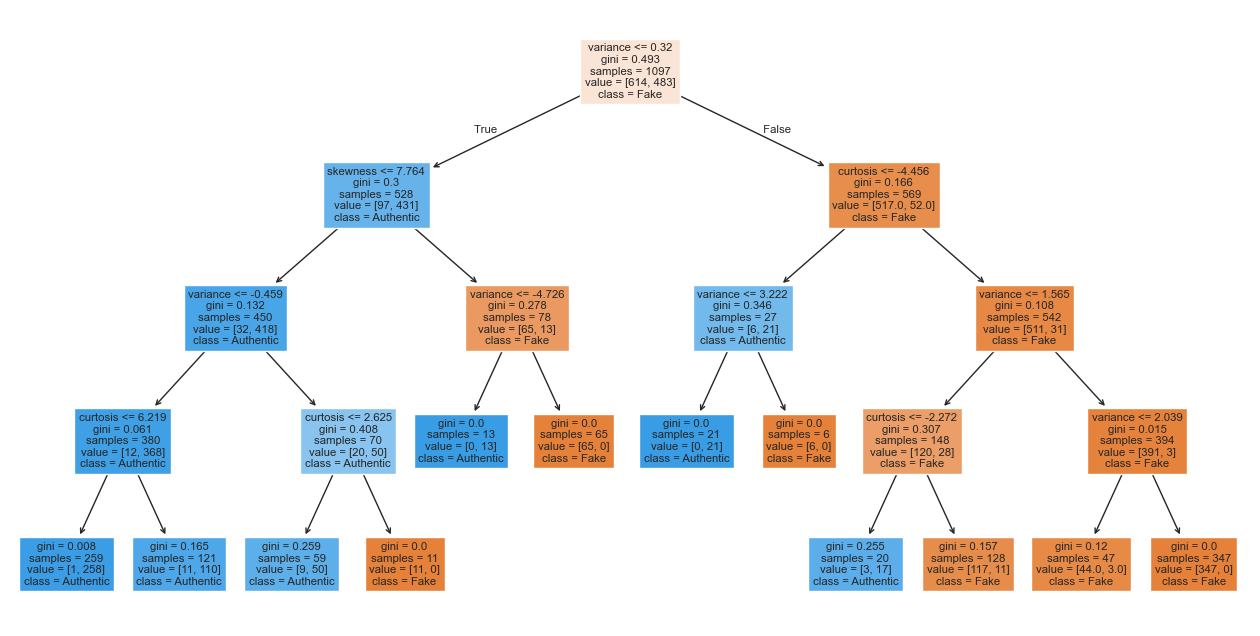

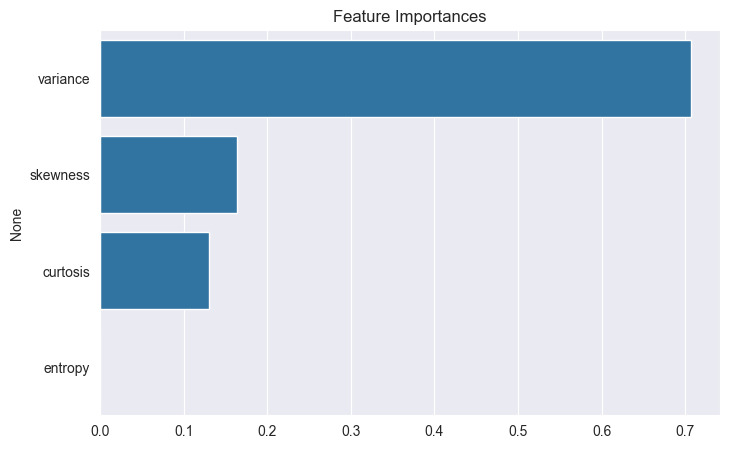

In [16]:
import pandas as pd

#Loading the dataset
df = pd.read_csv("/Users/Mesut/Desktop/Machine Learning/HWs/ML-HW#2/data_banknote_authentication 2.txt", header=None)
df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
print(df.head())

import seaborn as sns
import matplotlib.pyplot as plt

#Feature relationships
sns.pairplot(df, hue='class')
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

#Features and labels
X = df.drop('class', axis=1)
y = df['class']

#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Training the model
clf = DecisionTreeClassifier(max_depth=4, min_samples_split=10, criterion='gini', random_state=42)
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

#Confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()

#Plotting tree
from sklearn.tree import plot_tree
plt.figure(figsize=(16, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Fake', 'Authentic'])
plt.show()

#Plotting feature of importance
import numpy as np
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 5))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.show()
